In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns,scipy.stats as stats
from scipy.stats import pearsonr
import plotly.express as px

In [2]:
df = pd.read_csv('credit_risk_dataset1.csv')

In [3]:
df

Unnamed: 0  person_age  person_income person_home_ownership  \
0               0        22.0        59000.0                  RENT   
1               1        21.0         9600.0                   OWN   
2               2        25.0         9600.0              MORTGAGE   
3               3        23.0        65500.0                  RENT   
4               4        24.0        54400.0                  RENT   
...           ...         ...            ...                   ...   
32422       32422        26.0        45600.0                  RENT   
32423       32423        26.0        65004.0                  RENT   
32424       32424        26.0        64500.0                  RENT   
32425       32425        26.0        53000.0              MORTGAGE   
32426       32426        26.0        76000.0                  RENT   

       person_emp_length      loan_intent loan_grade  loan_amnt  \
0                    4.0         PERSONAL          D     8000.0   
1                    5.0        EDUCATION          B     1000.0   
2                    1.0          MEDICAL          C     5500.0   
3                    4.0          MEDICAL          C     8000.0   
4                    8.0          MEDICAL          C     8000.0   
...                  ...              ...        ...        ...   
32422                1.0          VENTURE          B    20000.0   
32423                4.0         PERSONAL          D    20000.0   
32424                0.0        EDUCATION          B     5000.0   
32425                1.0         PERSONAL          C     5800.0   
32426                3.0  HOMEIMPROVEMENT          B     8000.0   

       loan_int_rate  loan_status  loan_percent_income  \
0              16.02            1                 0.15   
1              11.14            0                 0.10   
2              12.87            1                 0.15   
3              15.23            1                 0.15   
4              14.27            1                 0.15   
...              ...          ...                  ...   
32422          10.00            1                 0.44   
32423          15.58            1                 0.31   
32424          11.26            0                 0.08   
32425          13.16            0                 0.11   
32426          10.99            1                 0.15   

      cb_person_default_on_file  cb_person_cred_hist_length  
0                             Y                         3.0  
1                             N                         2.0  
2                             N                         3.0  
3                             N                         2.0  
4                             Y                         4.0  
...                         ...                         ...  
32422                         N                         4.0  
32423                         Y                         4.0  
32424                         N                         4.0  
32425                         N                         4.0  
32426                         N                         4.0  

[32427 rows x 13 columns]

In [4]:
df.drop(columns='Unnamed: 0', inplace=True)

In [5]:
df

person_age  person_income person_home_ownership  person_emp_length  \
0            22.0        59000.0                  RENT                4.0   
1            21.0         9600.0                   OWN                5.0   
2            25.0         9600.0              MORTGAGE                1.0   
3            23.0        65500.0                  RENT                4.0   
4            24.0        54400.0                  RENT                8.0   
...           ...            ...                   ...                ...   
32422        26.0        45600.0                  RENT                1.0   
32423        26.0        65004.0                  RENT                4.0   
32424        26.0        64500.0                  RENT                0.0   
32425        26.0        53000.0              MORTGAGE                1.0   
32426        26.0        76000.0                  RENT                3.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D     8000.0          16.02            1   
1            EDUCATION          B     1000.0          11.14            0   
2              MEDICAL          C     5500.0          12.87            1   
3              MEDICAL          C     8000.0          15.23            1   
4              MEDICAL          C     8000.0          14.27            1   
...                ...        ...        ...            ...          ...   
32422          VENTURE          B    20000.0          10.00            1   
32423         PERSONAL          D    20000.0          15.58            1   
32424        EDUCATION          B     5000.0          11.26            0   
32425         PERSONAL          C     5800.0          13.16            0   
32426  HOMEIMPROVEMENT          B     8000.0          10.99            1   

       loan_percent_income cb_person_default_on_file  \
0                     0.15                         Y   
1                     0.10                         N   
2                     0.15                         N   
3                     0.15                         N   
4                     0.15                         Y   
...                    ...                       ...   
32422                 0.44                         N   
32423                 0.31                         Y   
32424                 0.08                         N   
32425                 0.11                         N   
32426                 0.15                         N   

       cb_person_cred_hist_length  
0                             3.0  
1                             2.0  
2                             3.0  
3                             2.0  
4                             4.0  
...                           ...  
32422                         4.0  
32423                         4.0  
32424                         4.0  
32425                         4.0  
32426                         4.0  

[32427 rows x 12 columns]

In [6]:
df['loan_status'] = df['loan_status'].astype('object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32427 entries, 0 to 32426
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32427 non-null  float64
 1   person_income               32427 non-null  float64
 2   person_home_ownership       32427 non-null  object 
 3   person_emp_length           32427 non-null  float64
 4   loan_intent                 32427 non-null  object 
 5   loan_grade                  32427 non-null  object 
 6   loan_amnt                   32427 non-null  float64
 7   loan_int_rate               32427 non-null  float64
 8   loan_status                 32427 non-null  object 
 9   loan_percent_income         32427 non-null  float64
 10  cb_person_default_on_file   32427 non-null  object 
 11  cb_person_cred_hist_length  32427 non-null  float64
dtypes: float64(7), object(5)
memory usage: 3.0+ MB


In [8]:
df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32427.000000   32427.000000       32427.000000  32427.000000   
mean      26.783205   58539.058346           4.406698   8631.822247   
std        4.431228   26889.620038           3.393899   4870.323980   
min       20.000000    4000.000000           0.000000    500.000000   
25%       23.000000   38500.000000           2.000000   5000.000000   
50%       26.000000   55000.000000           4.000000   8000.000000   
75%       29.000000   74000.000000           7.000000  12000.000000   
max       40.000000  140004.000000          14.000000  23000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  
count   32427.000000         32427.000000                32427.000000  
mean       11.016155             0.163029                    5.308416  
std         3.236222             0.094784                    3.219592  
min         5.420000             0.000000                    2.000000  
25%         7.900000             0.090000                    3.000000  
50%        10.990000             0.150000                    4.000000  
75%        13.470000             0.220000                    7.000000  
max        21.740000             0.440000                   15.000000

### Univariate

#### Person Age

- person age distribution is right skewed

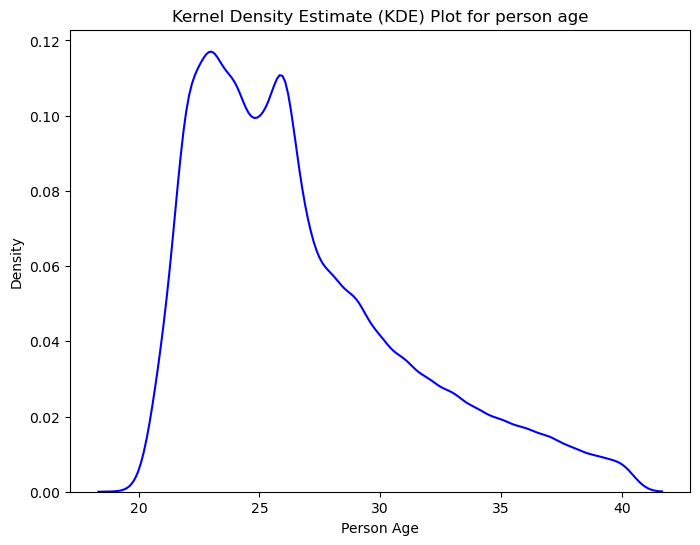

In [80]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['person_age'], color='blue')
plt.title('Kernel Density Estimate (KDE) Plot for person age')
plt.xlabel('Person Age')
plt.ylabel('Density')
plt.show()

#### person_income

- Person_income widely ditributed and sightly right skewed

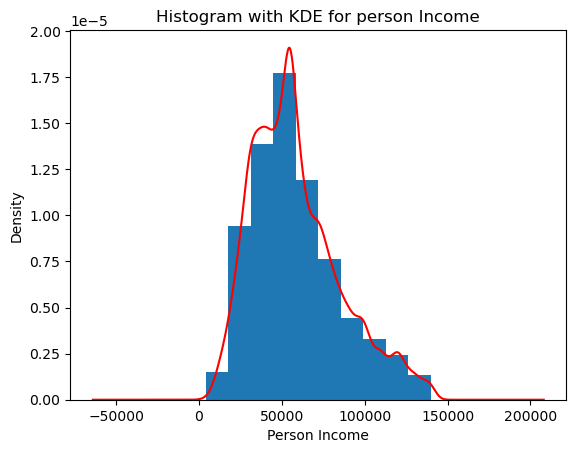

In [81]:
df['person_income'].plot(kind='hist', density=True)
df['person_income'].plot(kind='kde', color='red')
plt.xlabel('Person Income')
plt.ylabel('Density')
plt.title('Histogram with KDE for person Income')
plt.show()

#### person_home_ownership

- person_home_ownership has no distribution

C:\Users\DELL\AppData\Local\Temp\ipykernel_7464\2464119709.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='person_home_ownership', data=df, palette='pastel')


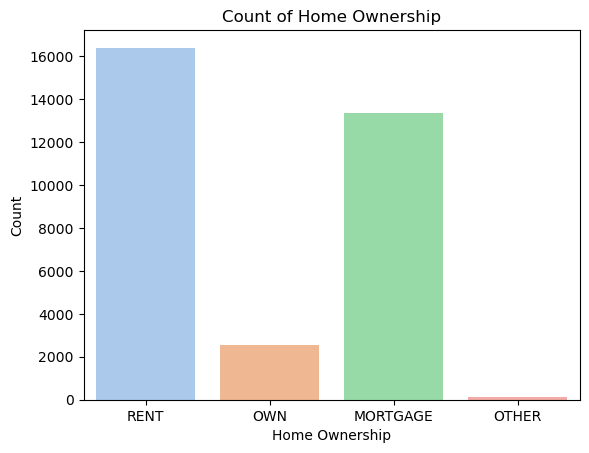

In [32]:
sns.countplot(x='person_home_ownership', data=df, palette='pastel')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Count of Home Ownership')
plt.show()

#### loan intent

- loan_intent has no ditribution

C:\Users\DELL\AppData\Local\Temp\ipykernel_7464\3449426798.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_intent', data=df, palette='pastel')


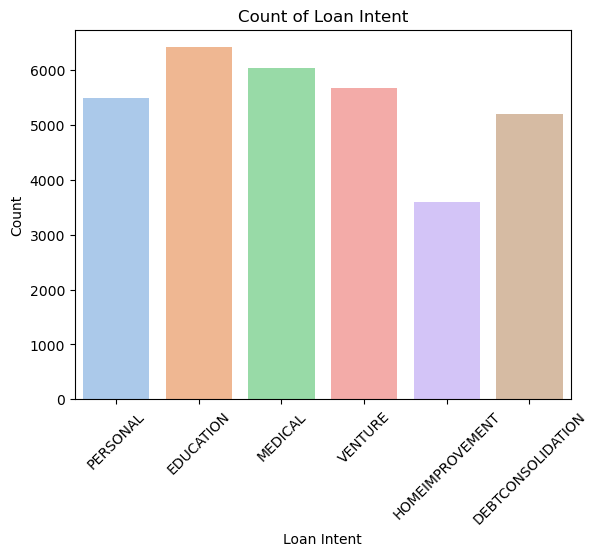

In [33]:
sns.countplot(x='loan_intent', data=df, palette='pastel')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.title('Count of Loan Intent')
plt.xticks(rotation=45)
plt.show()

#### loan_grade

- loan_grade is right skewed

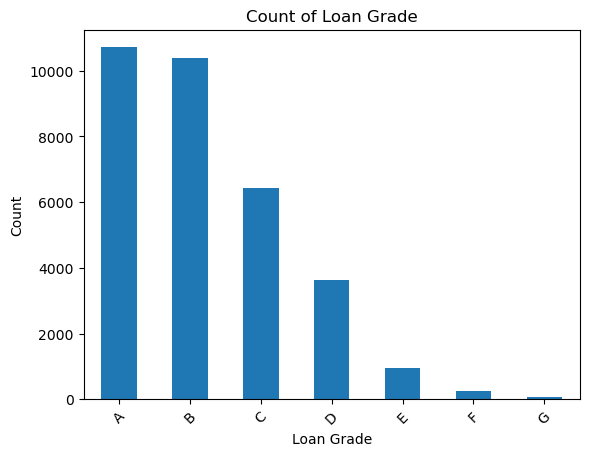

In [68]:
df['loan_grade'].value_counts().plot(kind='bar')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.title('Count of Loan Grade')
plt.xticks(rotation=45)
plt.show()

#### cb_person_default_on_file

- cb_person_default_on_file is right skewed

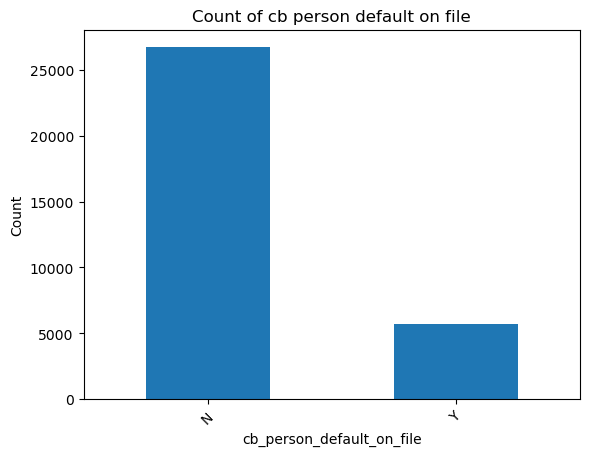

In [82]:
df['cb_person_default_on_file'].value_counts().plot(kind='bar')
plt.xlabel('cb_person_default_on_file')
plt.ylabel('Count')
plt.title('Count of cb person default on file')
plt.xticks(rotation=45)
plt.show()

#### person_emp_length

- person_emp_length is right skewed

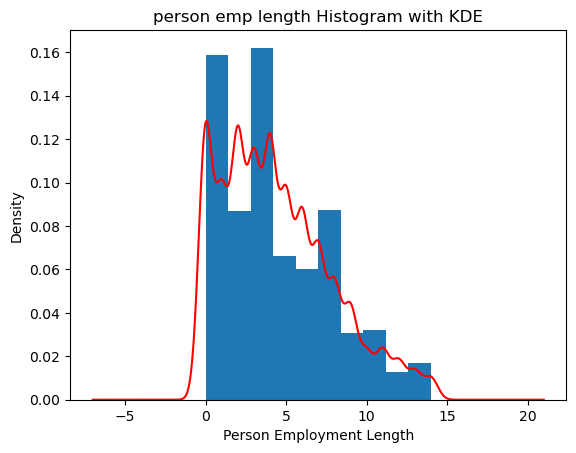

In [83]:
df['person_emp_length'].plot(kind='hist', density=True)
df['person_emp_length'].plot(kind='kde', color='red')
plt.xlabel('Person Employment Length')
plt.ylabel('Density')
plt.title('person emp length Histogram with KDE')
plt.show()

#### loan_amnt

- loan_amnt is right skewed

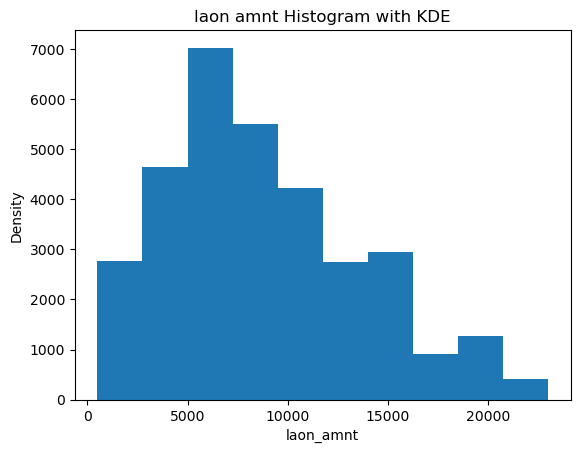

In [84]:
df['loan_amnt'].plot(kind='hist')
plt.xlabel('laon_amnt')
plt.ylabel('Density')
plt.title('laon amnt Histogram with KDE')
plt.show()

#### loan_int_rate

- loan_int_rate is right skewed

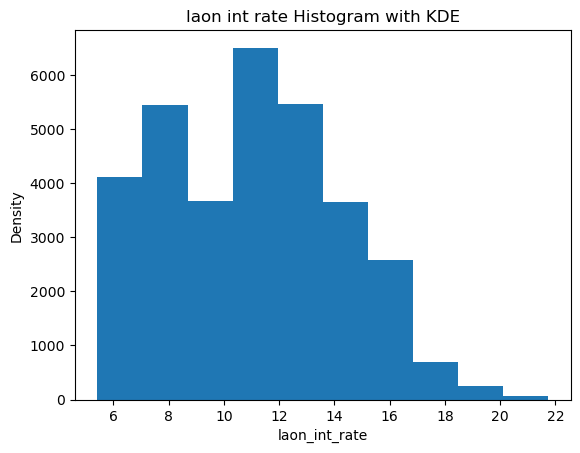

In [85]:
df['loan_int_rate'].plot(kind='hist')
plt.xlabel('laon_int_rate')
plt.ylabel('Density')
plt.title('laon int rate Histogram with KDE')
plt.show()

#### loan_persent_income

- loan_percent_income is right skewed

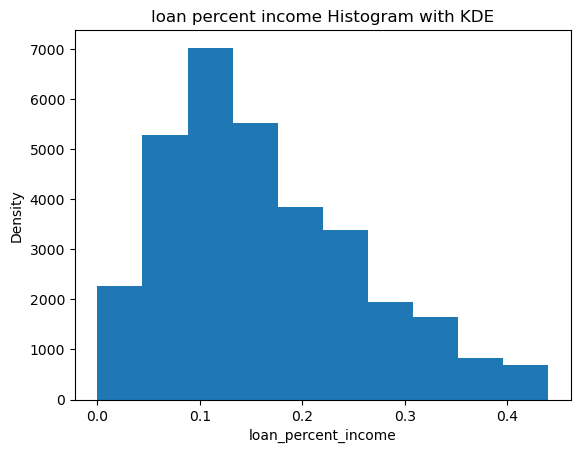

In [86]:
df['loan_percent_income'].plot(kind='hist')
plt.xlabel('loan_percent_income')
plt.ylabel('Density')
plt.title('loan percent income Histogram with KDE')
plt.show()

#### cb_person_cred_hist_length

- cb_person_cred_hist_length is right skewed

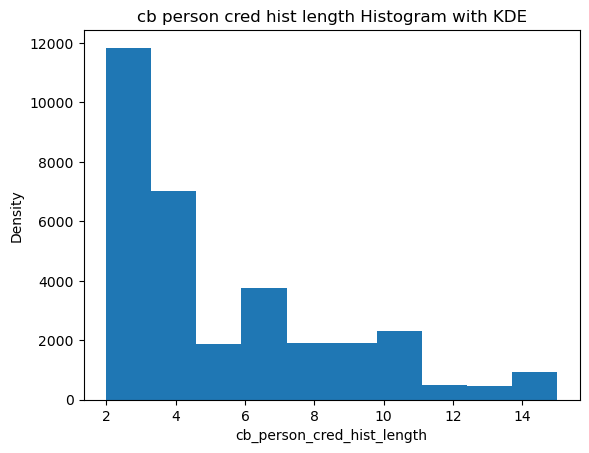

In [87]:
df['cb_person_cred_hist_length'].plot(kind='hist')
plt.xlabel('cb_person_cred_hist_length')
plt.ylabel('Density')
plt.title('cb person cred hist length Histogram with KDE')
plt.show()

- This is pair plot of all numerical variables

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


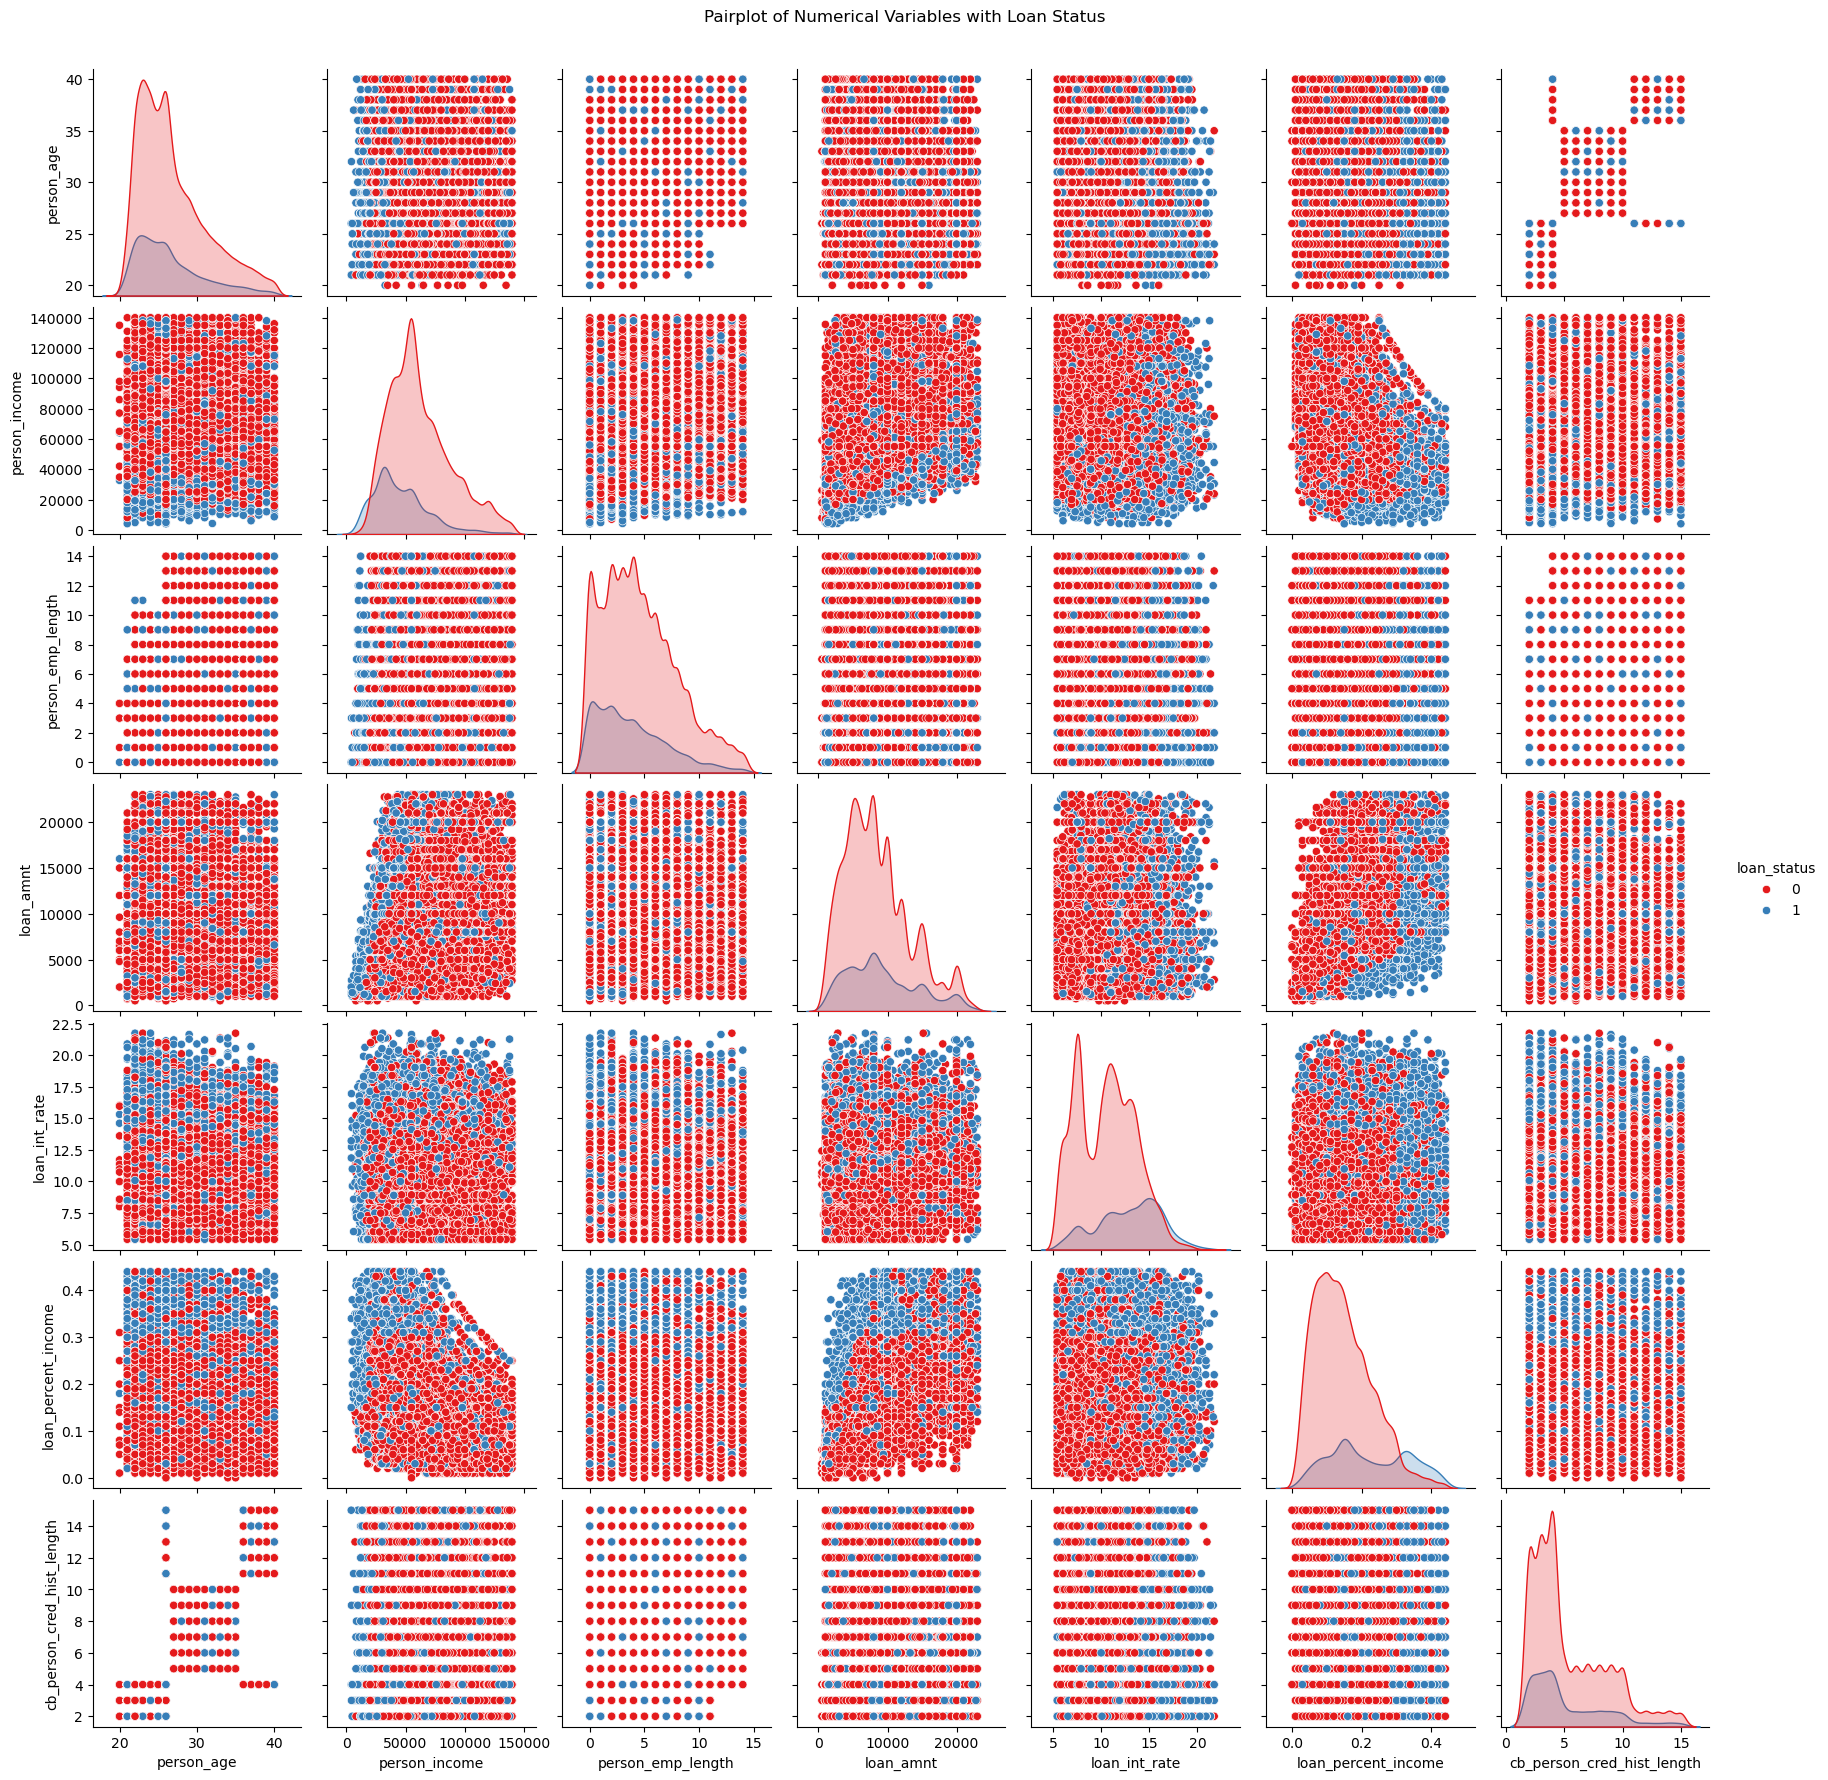

In [8]:
sns.pairplot(df, hue='loan_status', palette='Set1')
plt.suptitle('Pairplot of Numerical Variables with Loan Status', y=1.02)
plt.show()

### Bivariate

#### Person age vs laon status

- Age ranging from 22 to 26 is generally considered to be associated with lower credit risk compared to other age groups.

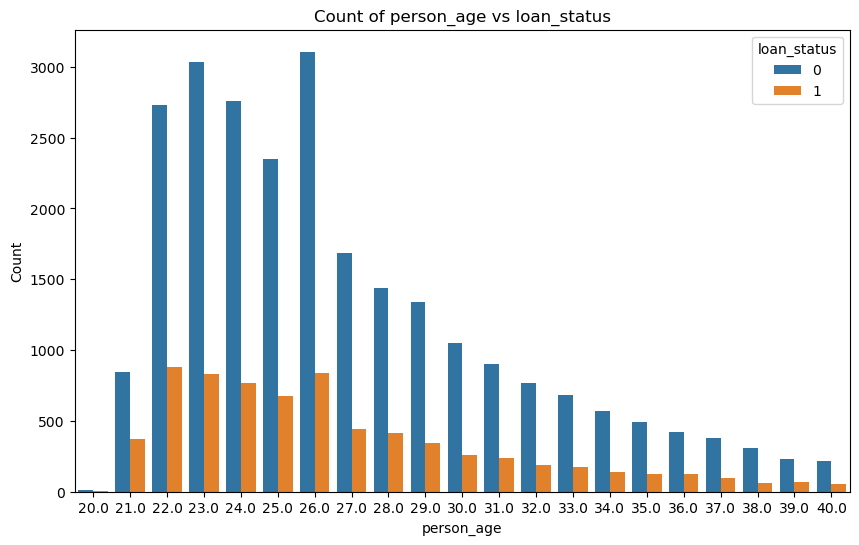

In [101]:
plt.figure(figsize=(10, 6))
sns.countplot(x='person_age', hue='loan_status', data=df)
plt.title('Count of person_age vs loan_status')
plt.xlabel('person_age')
plt.ylabel('Count')
plt.legend(title='loan_status')

#### loan_percent_income vs loan_status

- loan_percent_income for credit free risk has data is highly ditributed and more dence points

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Text(16.509482703189306, 0.5, 'Density')

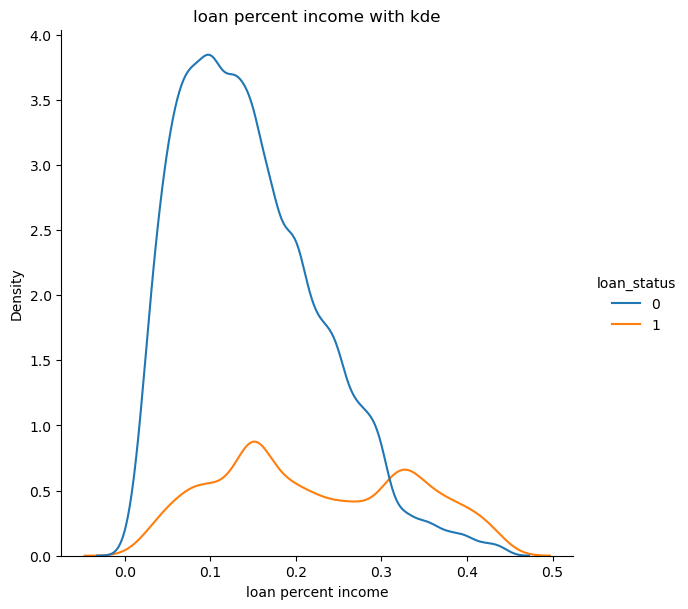

In [91]:
sns.displot(data=df,x='loan_percent_income',kind='kde',hue='loan_status',height = 6)
plt.title('loan percent income with kde')
plt.xlabel('loan percent income')
plt.ylabel('Density')

#### loan grade vs loan status

- Loan Grade A & B & C can be credit free risk among other loan grade people

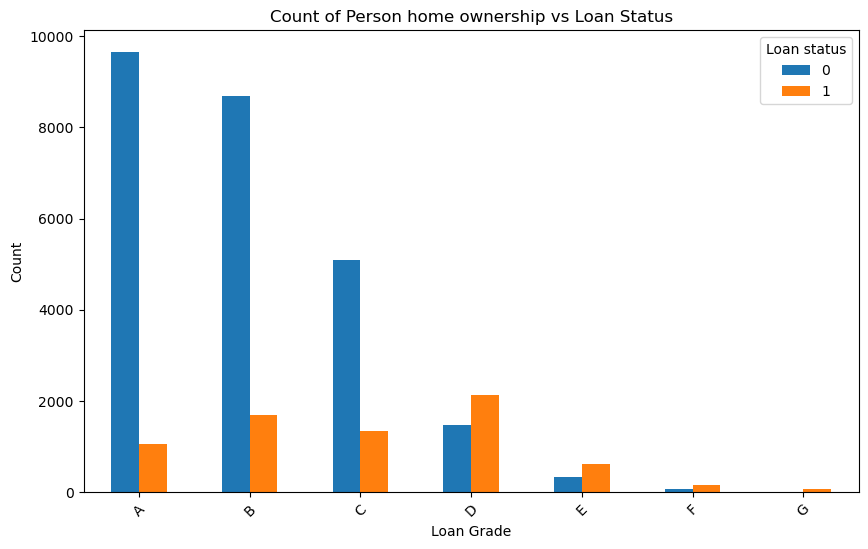

In [100]:
grouped_data = pd.crosstab(df['loan_grade'], df['loan_status'])
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Count of Person home ownership vs Loan Status')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan status')

#### loan_amnt vs loan_status

- loan_amount for credit free risk has where more data is distributed widely and more data points are present

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Text(29.759482703189306, 0.5, 'Density')

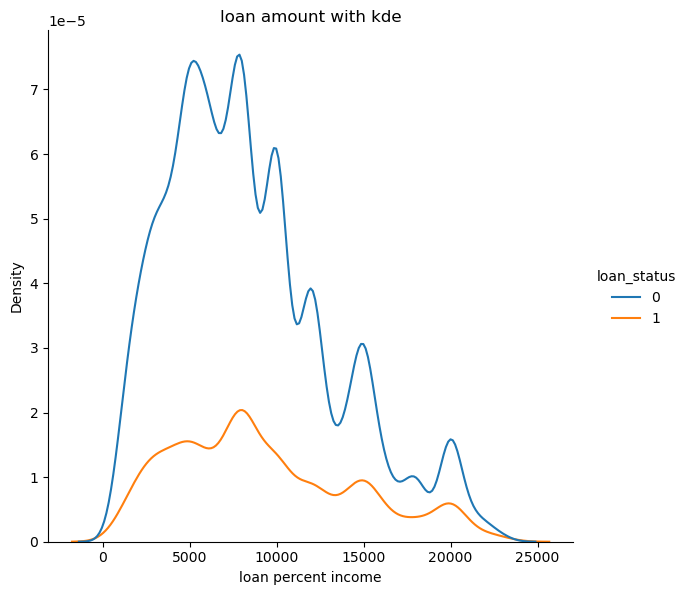

In [92]:
sns.displot(data=df,x='loan_amnt',kind='kde',hue='loan_status',height = 6)
plt.title('loan amount with kde')
plt.xlabel('loan percent income')
plt.ylabel('Density')

#### loan_intent vs loan_status

- Loan intent like Education, Venture, Medical, personal can be credit free risk among other loan intent people

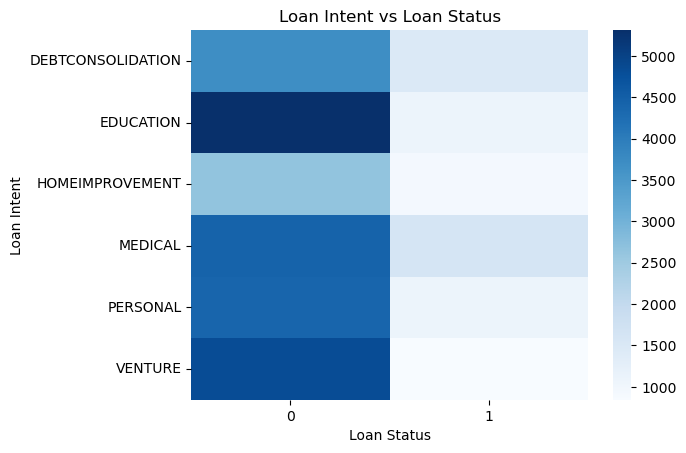

In [99]:
loan_intent_grade_ct = pd.crosstab(df['loan_intent'], df['loan_status'])
sns.heatmap(loan_intent_grade_ct, cmap='Blues')
plt.xlabel('Loan Status')
plt.ylabel('Loan Intent')
plt.title('Loan Intent vs Loan Status')
plt.show()

#### loan_int_rate vs loan_status

- Loans with interest rates ranging from 5% to 12.5% can be obtained without the need for a credit check

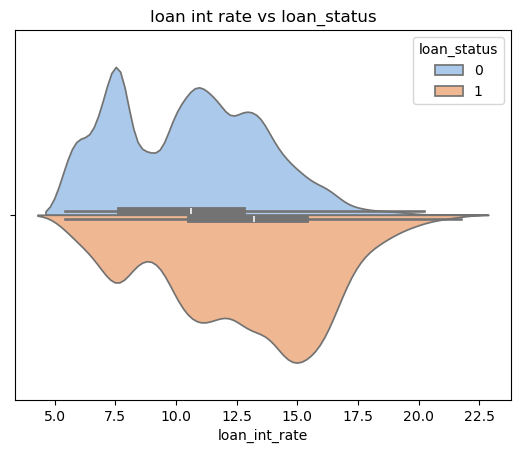

In [105]:
sns.violinplot(x='loan_int_rate',hue='loan_status',split=True,palette='pastel', data=df)
plt.title('loan int rate vs loan_status')
plt.show()

#### person_home_ownership vs loan_status

- person_home_ownership of Mortage, Own, Rent can be credit free risk from others

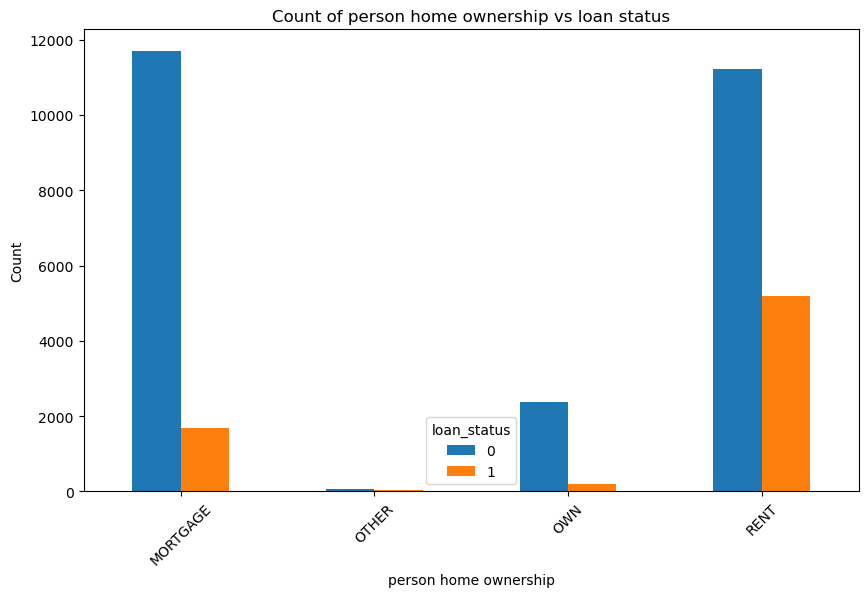

In [98]:
grouped_data = pd.crosstab(df['person_home_ownership'],df['loan_status'])
grouped_data.plot(kind='bar',figsize=(10, 6))
plt.title('Count of person home ownership vs loan status')
plt.xlabel('person home ownership')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='loan_status')

#### person_income vs loan_status

- for personal income loan_status=0 data is widely distributed than loan_status=1

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Text(16.509482703189306, 0.5, 'Density')

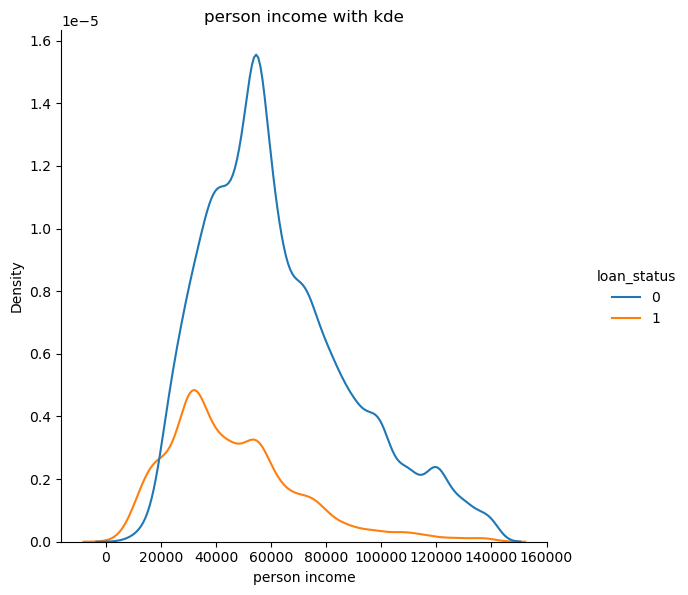

In [96]:
sns.displot(data=df,x='person_income',kind='kde',hue='loan_status',height = 6)
plt.title('person income with kde')
plt.xlabel('person income')
plt.ylabel('Density')

#### cb_person_default_on_file vs loan_status

- loan-intent 'no' has highest count for loan status 0 

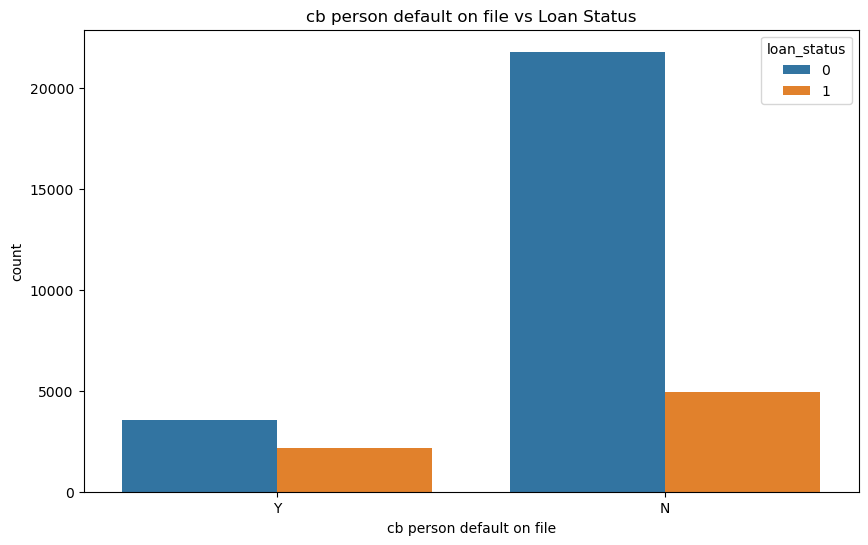

In [97]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cb_person_default_on_file', hue='loan_status', data=df)
plt.xlabel('cb person default on file')
plt.ylabel('count')
plt.title('cb person default on file vs Loan Status')
plt.show()

#### person_emp_length vs loan_status

- for person_emp_length the data is widely distributed for credit free risk

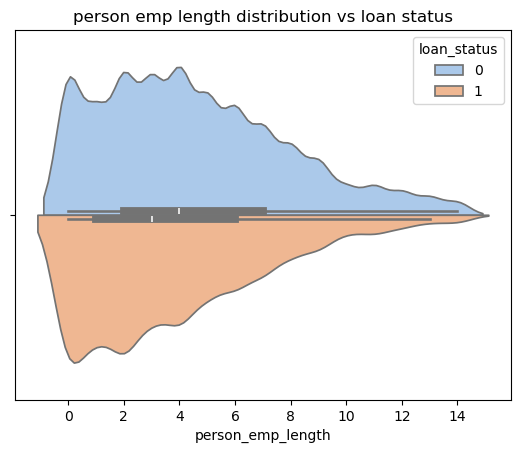

In [106]:
sns.violinplot(x='person_emp_length',hue='loan_status',split=True,palette='pastel', data=df)
plt.title('person emp length distribution vs loan status')
plt.show()

#### cb_person_cred_hist_length vs loan_status 

- cb_person_credit_hist_length from 2 to 10 can be credit free risk 

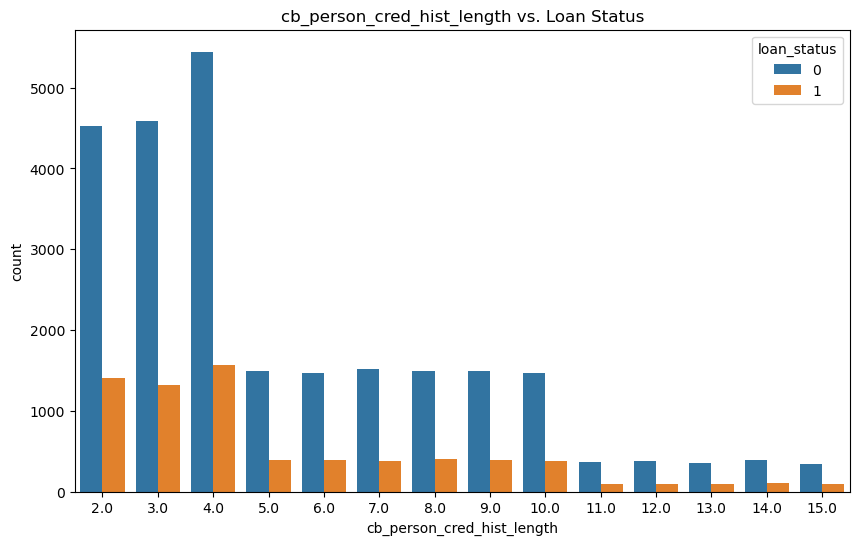

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cb_person_cred_hist_length', hue='loan_status', data=df)
plt.xlabel('cb_person_cred_hist_length')
plt.ylabel('count')
plt.title('cb_person_cred_hist_length vs. Loan Status')
plt.show()

#### loan_int_rate vs laon_status

- loan_int_rate is widely ditributed with for credit free risk

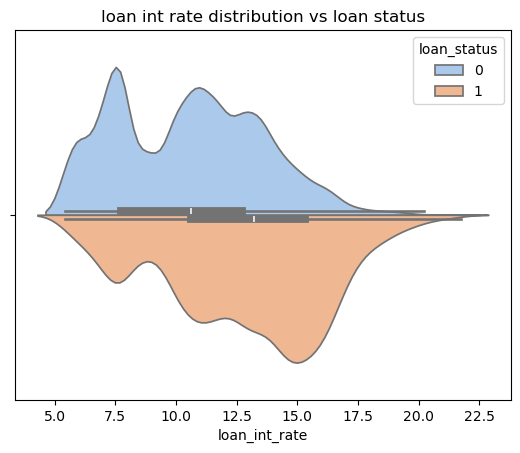

In [107]:
sns.violinplot(x='loan_int_rate',hue='loan_status',split=True,palette='pastel', data=df)
plt.title('loan int rate distribution vs loan status')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3156\3333064868.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




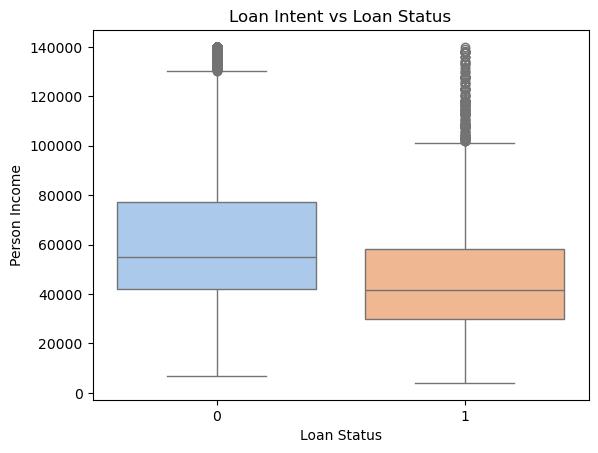

In [104]:
sns.boxplot(x=df['loan_status'],y=df['person_income'],palette='pastel')
plt.xlabel('Loan Status')
plt.ylabel('Person Income')
plt.title('Loan Intent vs Loan Status')
plt.show()